In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# 0. Preamble

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# notebook_path = '/content/drive/MyDrive/Colab_Notebooks/ISER/code/'
# os.chdir(notebook_path)

In [4]:
data = pd.read_csv("../raw_data/global_crisis_data_country.csv", encoding='unicode_escape')
data.drop(0, inplace = True)
data.shape

(15190, 27)

In [5]:
data.rename(columns={'Banking Crisis ':'banking_crisis',
                    'Systemic Crisis':'systemic_crisis',
                    'Banking_Crisis_Notes':'notes',
                    'Currency Crises':'currency_crisis',
                    'Inflation Crises':'inflation_crisis',
                    'Gold Standard':'gold_standard',
                    'SOVEREIGN EXTERNAL DEBT 1: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom and post-1975 defaults on Official External Creditors': 'sovereign_external_debt_1',
                    'SOVEREIGN EXTERNAL DEBT 2: DEFAULT and RESTRUCTURINGS, 1800-2012--Does not include defaults on WWI debt to United States and United Kingdom but includes post-1975 defaults on Official External Creditors': 'sovereign_external_debt_2',
                    'Inflation, Annual percentages of average consumer prices':'annual_inflation'},
            inplace = True)

data['Year'] = data['Year'].astype(int)

columns_to_convert = ['banking_crisis', 'systemic_crisis', 'annual_inflation', 'currency_crisis', 'inflation_crisis']
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [6]:
GDP_pc = pd.read_csv('../raw_data/gdp-per-capita-maddison.csv')
GDP_pc.drop(columns='417485-annotations', inplace = True)
GDP_pc.rename(columns={'GDP per capita':'GDP_per_capita'}, inplace = True)

# 1. Selecting countries for global analysis

In [7]:
from dataset import concat_dataset
from dataset import dummy_variable

In [8]:
# List of countries
OECD = ['DEU', 'AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'KOR', 'DNK', 'ESP', 'USA', 'FIN', 'FRA', 'GRC', 'HUN', 'IRL', 'ISL', 'ITA', 'JPN', 'MEX', 'NOR', 'NZL', 'NLD', 'POL', 'PRT', 'GBR', 'SWE', 'CHE', 'TUR']
G7 = ['CAN', 'FRA', 'DEU', 'ITA', 'JPN', 'GBR', 'USA']
G20 = ['DEU', 'CAN', 'FRA', 'GBR', 'JPN', 'ITA', 'USA', 'ZAF', 'SAU', 'RUS', 'CHN', 'ARG', 'BRA', 'IND', 'KOR', 'MEX', 'TUR', 'IDN']
UE = ['DEU', 'FRA', 'AUT', 'BEL', 'DNK', 'ESP', 'NLD', 'POL', 'PRT', 'SWE']
USA = ['USA']

#List for all countries
unique_countries_df1 = set(data['CC3'].unique())
unique_countries_df2 = set(GDP_pc['Code'].unique())
ALL = list(unique_countries_df1.intersection(unique_countries_df2))

In [9]:
#Select a list among those listed above:
countries_selected = ALL
#Create a dataset with the data of the countries of the list
global_data = concat_dataset(GDP_pc, data, countries_selected, 'left')
dummy_variable(global_data)

In [10]:
global_data

,Case,CC3,Country,Year,banking_crisis,notes,systemic_crisis,gold_standard,exch_usd,exch_usd_alt1,...,<,annual_inflation,Independence,currency_crisis,inflation_crisis,output_gap,banking_crisis_only,excluded_years,banking_crisis_only_first_year,recovery_only
0,23.0,DEU,Germany,1800,0.0,NaN,0.0,0,3.1746,NaN,...,NaN,-12.3,1,0,0.0,-13.33,0,0,0,1
1,23.0,DEU,Germany,1801,0.0,NaN,0.0,0,2.7397,NaN,...,NaN,-7.1,1,0,0.0,NaN,0,0,0,1
2,23.0,DEU,Germany,1802,0.0,NaN,0.0,0,2.7397,NaN,...,NaN,46.5,1,0,1.0,NaN,0,1,0,0
3,23.0,DEU,Germany,1803,0.0,NaN,0.0,0,2.8571,NaN,...,NaN,3.7,1,0,0.0,NaN,0,0,0,1
4,23.0,DEU,Germany,1804,0.0,NaN,0.0,0,2.8169,NaN,...,NaN,-9.9,1,0,0.0,NaN,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14968,7.0,BOL,Bolivia,2012,0.0,NaN,0.0,0,6.91,6.96,...,NaN,4.5,1,0,0.0,-0.96,0,0,0,1
14969,7.0,BOL,Bolivia,2013,0.0,NaN,0.0,0,6.91,6.91,...,NaN,5.7,1,0,0.0,0.96,0,0,0,1
14970,7.0,BOL,Bolivia,2014,0.0,NaN,0.0,0,6.91,6.91,...,NaN,5.8,1,0,0.0,1.69,0,0,0,1
14971,7.0,BOL,Bolivia,2015,NaN,NaN,NaN,0,6.91,6.91,...,NaN,4.1,1,0,0.0,1.93,0,0,0,1


In [11]:
banking_crisis_only_first_year = global_data[global_data['banking_crisis_only_first_year'] == 1]['Year'].tolist()  #Appending those years to a list
print(f'In this approch, we record {len(banking_crisis_only_first_year)} different crisis event.')

In this approch, we record 191 different crisis event.


In [12]:
from functionsA import compute_crisis_duration
from functionsA import length_frequency

In [13]:
crisis_duration = compute_crisis_duration(global_data)
len_freq = length_frequency(crisis_duration)
len_freq

,Length,Count,Number of points
0,1,95,191
1,2,37,96
2,3,16,59
3,4,16,43
4,5,6,27
5,6,4,21
6,7,10,17
7,8,3,7
8,9,1,4
9,10,1,3


# 2. Extracting inflation series

In [14]:
from functionsA import extract_inflation_series
from functionsA import normalize_crisis_data

In [15]:
inflation_series = extract_inflation_series(global_data)
norm_inflation_series = normalize_crisis_data(inflation_series)
len(inflation_series)

191

In [29]:
inflation_series


[[-2.5, -18.5, -4.9, 0.0, 6.8, 4.8],
 [-1.4, 5.6, 1.3, -2.6, 0.0, -4.0, -2.8, -2.9, 0.0, 2.9],
 [1.3, 1.3, 0.0, 0.0, 1.3, 3.8, 6.1, 1.1, 0.0, 2.3],
 [0.9, -0.1, -7.2, -7.6, -9.6, 2.0, 1.3, 1.0, 0.7, 0.4],
 [3.7, 3.5, 2.5, 5.4, 5.4, 6.3, 5.3, 3.3],
 [2.3, 2.7, 0.2, 1.2, 2.5, 2.1, 1.6, 0.8, 0.1, 0.5],
 [4.3, -2.0, -8.3, -2.3, 2.3, 3.4, -1.1, -2.2, 1.1, 1.1],
 [1.0, 1.0, -7.8, -6.4, 8.0, 2.1, -1.0, -5.2, -2.2],
 [-2.2, -3.4, -4.7, 0.0, -2.4, 3.7, 1.2, 9.5, -5.4, -5.7],
 [3.6, 0.0, -3.4, 0.0, 2.4, 1.2],
 [1.2, 5.7, 2.2, -3.2, 1.1, -1.1, 5.5, 4.2],
 [4.2, 3.0, 16.0],
 [-5.7, -3.3, 0.7],
 [0.7, 3.1, 5.0, 5.3, 3.1, 2.6, 2.1, 1.4, 1.6, 1.9],
 [1.7, 3.4, 1.3, 2.3, 2.8, 2.4, 0.8, 0.6, 0.5, 0.8],
 [10.4, -0.2, -3.8, -4.3, -3.1, -4.6, -4.6, -2.3, 6.3, 2.4],
 [2.4, 1.1, 7.7, 0.4, 1.2, 1.0, 2.7],
 [2.7, 3.7, 1.8, 1.5, 4.4, 14.0],
 [-6.8, 0.5, -1.0, 2.7, -0.8, -1.5, -0.1, 1.1],
 [10.8, 5.8, 4.3, 4.0, 4.2, 4.4, 4.1, 5.0, 4.8, 5.6],
 [-2.7, -9.1, -13.0, -12.7, -1.3, 5.3, -6.3, -4.1, 5.6, 5.3],
 [5.1, -

## 2.1 Inflation response to each year of crisis

In [16]:
from visualisation import plot_by_crisis_length

95


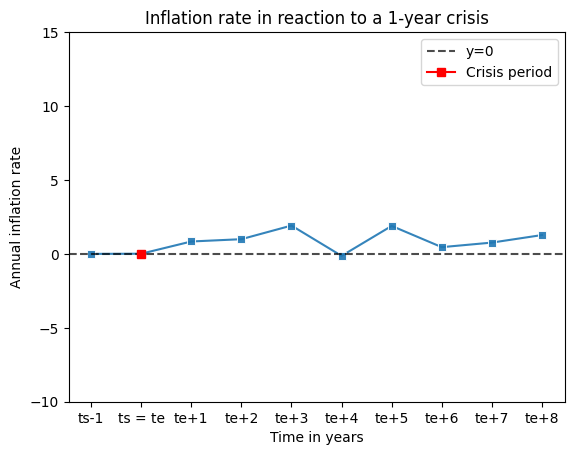

37


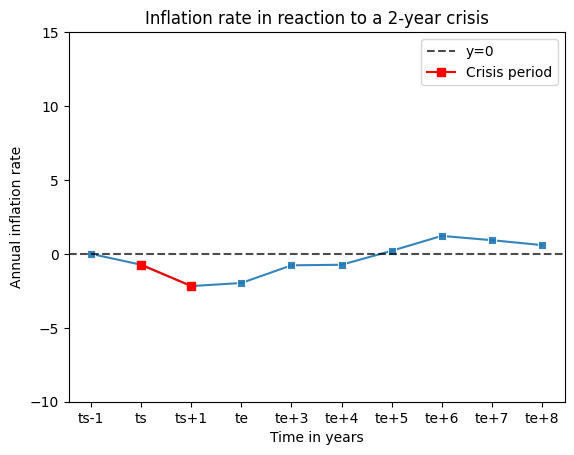

16


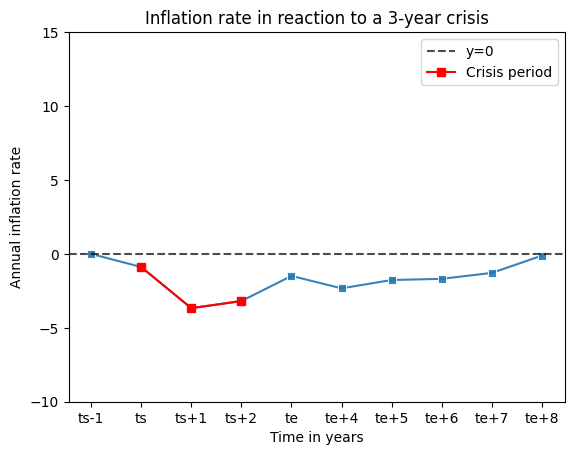

16


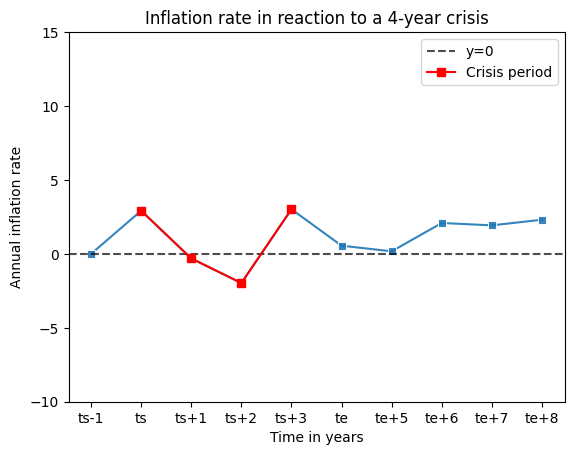

6


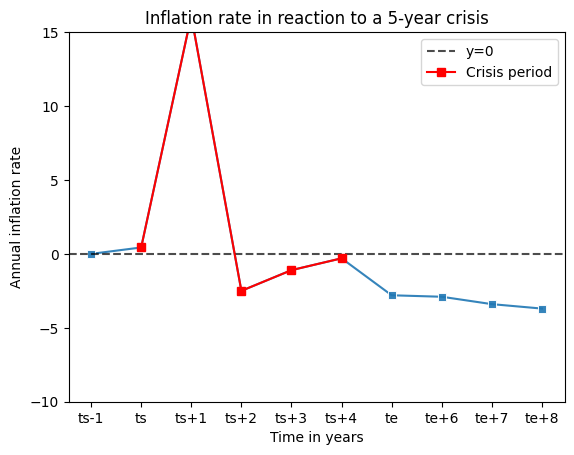

4


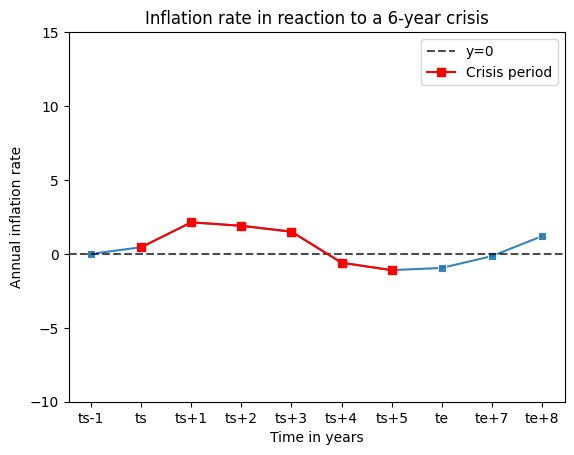

10


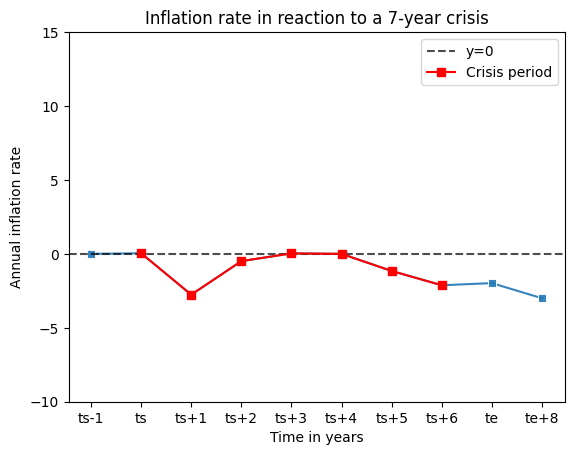

3


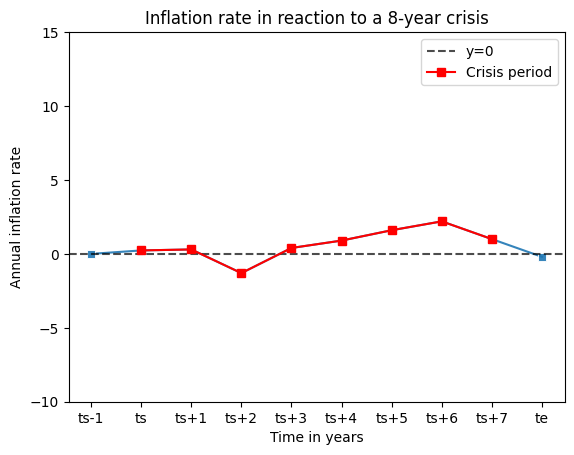

1


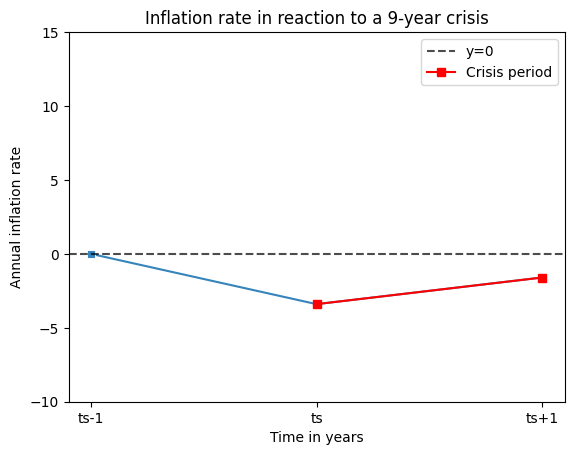

1


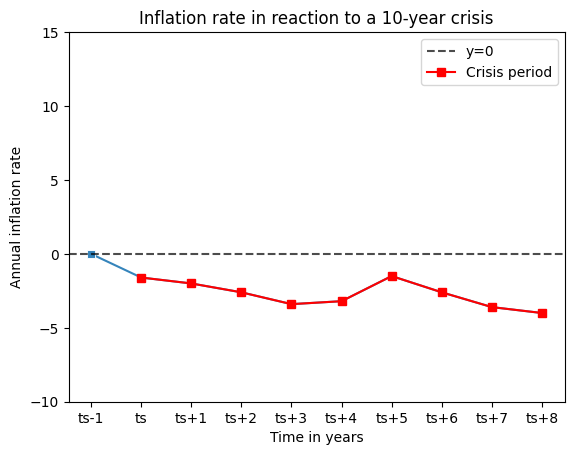

1


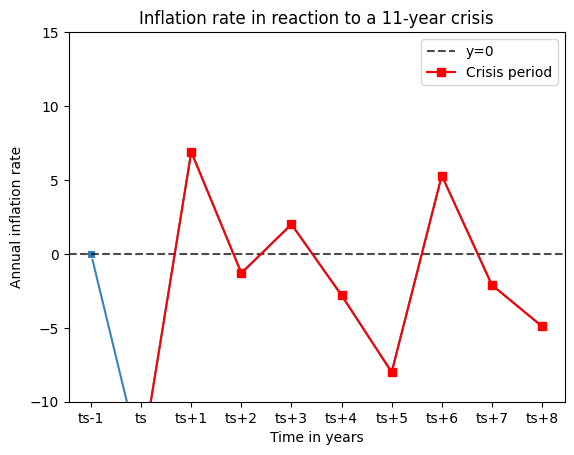

1


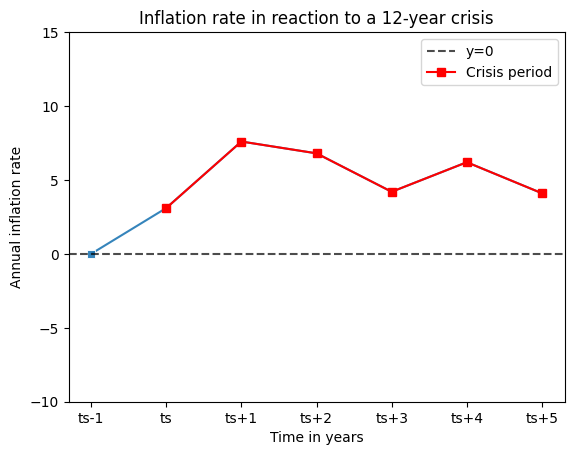

In [17]:
plot_by_crisis_length(norm_inflation_series, crisis_duration, len_freq, 'Inflation rate')

# 3. Extracting output gap series

In [18]:
from functionsA import extract_output_gap_series

In [19]:
global_data_inner = concat_dataset(GDP_pc, data, countries_selected, 'inner')
dummy_variable(global_data_inner)
global_data_inner

,Case,CC3,Country,Year,banking_crisis,notes,systemic_crisis,gold_standard,exch_usd,exch_usd_alt1,...,<,annual_inflation,Independence,currency_crisis,inflation_crisis,output_gap,banking_crisis_only,excluded_years,banking_crisis_only_first_year,recovery_only
0,23.0,DEU,Germany,1800,0.0,NaN,0.0,0,3.1746,NaN,...,NaN,-12.3,1,0,0.0,-13.33,0,0,0,1
1,23.0,DEU,Germany,1820,0.0,NaN,0.0,0,2.8701,NaN,...,NaN,-4.2,1,0,0.0,-16.90,0,0,0,1
2,23.0,DEU,Germany,1850,0.0,NaN,0.0,0,2.7442,NaN,...,0,-2.9,1,0,0.0,15.55,0,0,0,1
3,23.0,DEU,Germany,1851,0.0,NaN,0.0,0,2.7255,NaN,...,0,26.3,1,0,1.0,9.68,0,1,0,0
4,23.0,DEU,Germany,1852,0.0,NaN,0.0,0,2.6936,NaN,...,0,17.2,1,0,0.0,7.24,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9025,7.0,BOL,Bolivia,2012,0.0,NaN,0.0,0,6.91,6.96,...,NaN,4.5,1,0,0.0,-0.96,0,0,0,1
9026,7.0,BOL,Bolivia,2013,0.0,NaN,0.0,0,6.91,6.91,...,NaN,5.7,1,0,0.0,0.96,0,0,0,1
9027,7.0,BOL,Bolivia,2014,0.0,NaN,0.0,0,6.91,6.91,...,NaN,5.8,1,0,0.0,1.69,0,0,0,1
9028,7.0,BOL,Bolivia,2015,NaN,NaN,NaN,0,6.91,6.91,...,NaN,4.1,1,0,0.0,1.93,0,0,0,1


In [20]:
banking_crisis_only_first_year = global_data_inner[global_data_inner['banking_crisis_only_first_year'] == 1]['Year'].tolist()  #Appending those years to a list
print(f'In this approch, we record {len(banking_crisis_only_first_year)} different crisis event.')

In this approch, we record 174 different crisis event.


In [21]:
crisis_duration = compute_crisis_duration(global_data_inner)
len_freq = length_frequency(crisis_duration)
len_freq

,Length,Count,Number of points
0,1,88,174
1,2,32,86
2,3,15,54
3,4,13,39
4,5,5,26
5,6,4,21
6,7,10,17
7,8,3,7
8,9,1,4
9,10,1,3


In [22]:
output_gap_series = extract_output_gap_series(global_data_inner)
len(output_gap_series)

174

## 3.1 Output gap response for each length of crisis

88


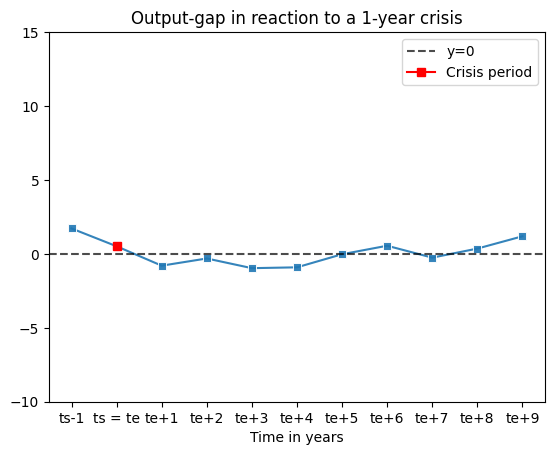

32


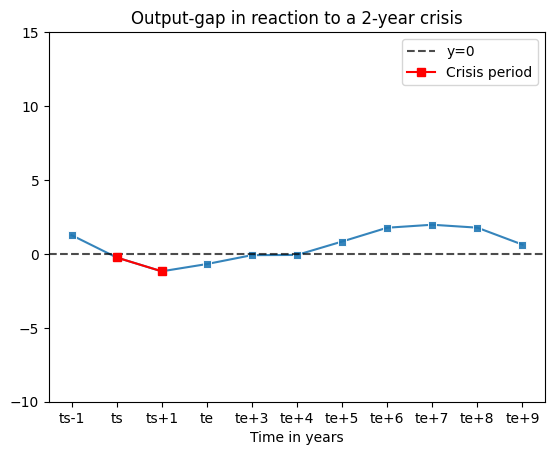

15


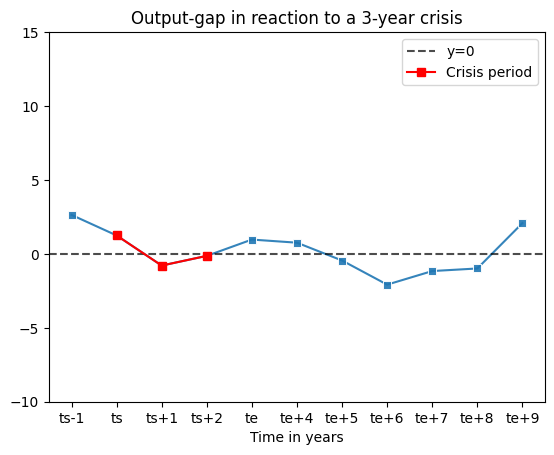

13


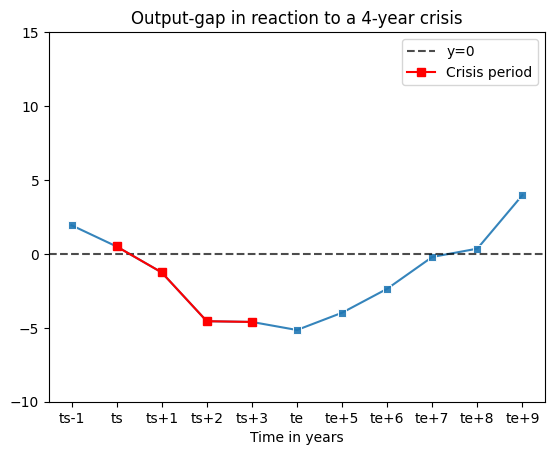

5


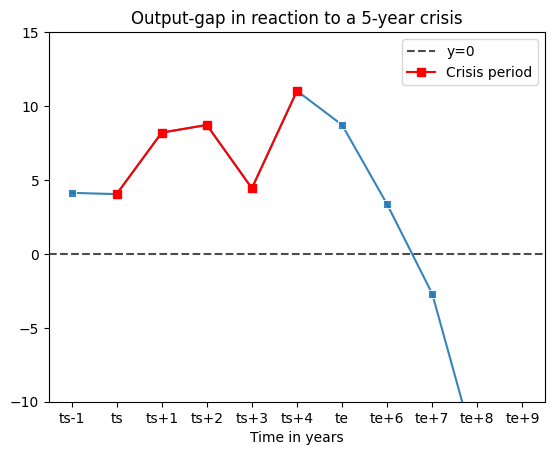

4


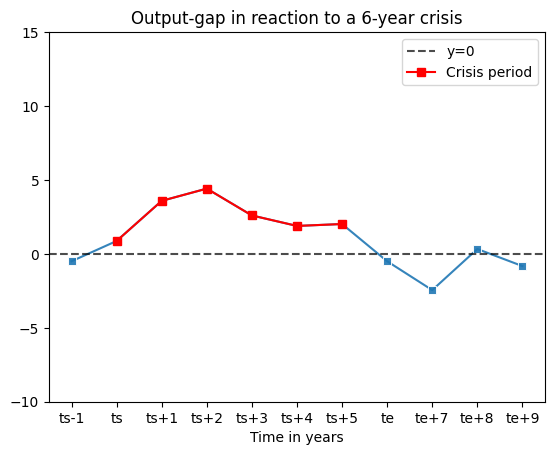

10


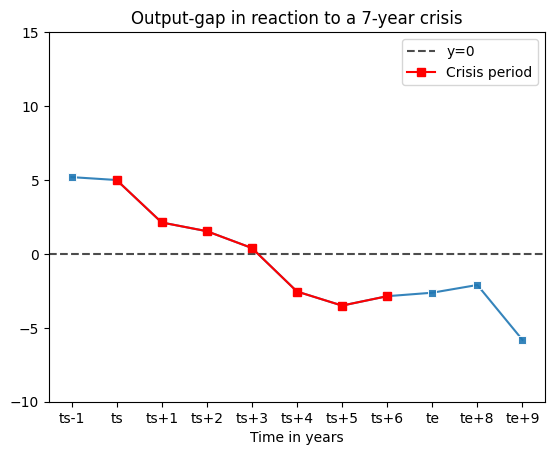

3


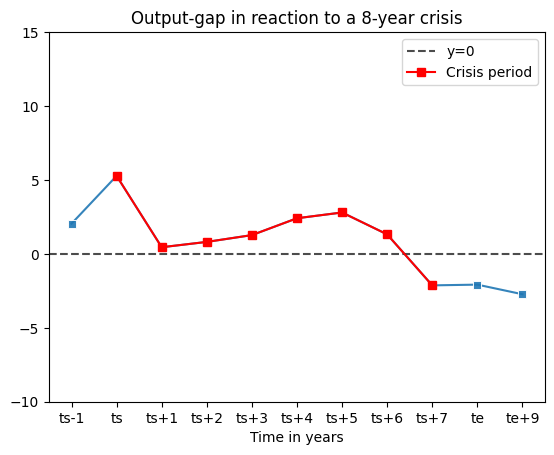

1


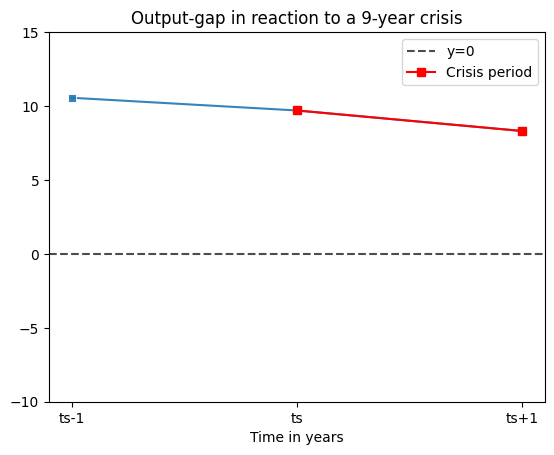

1


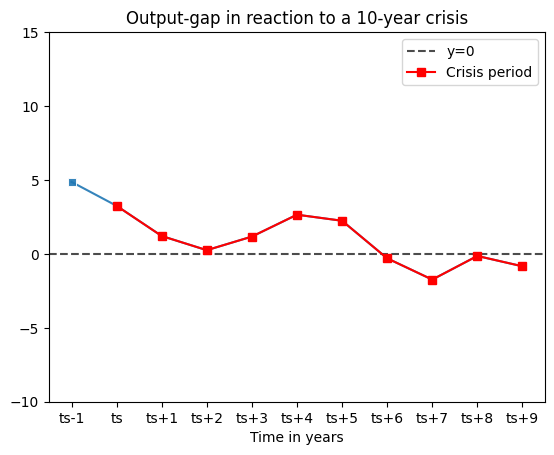

1


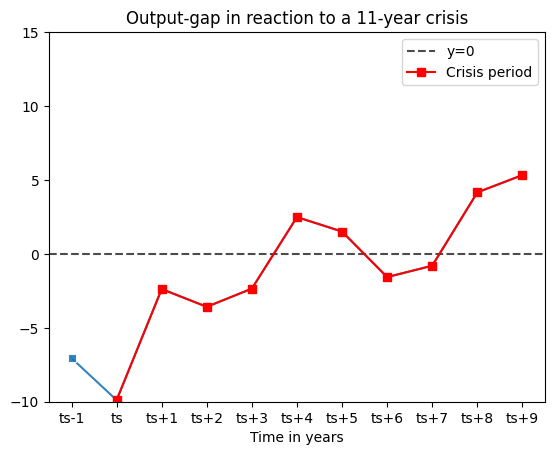

1


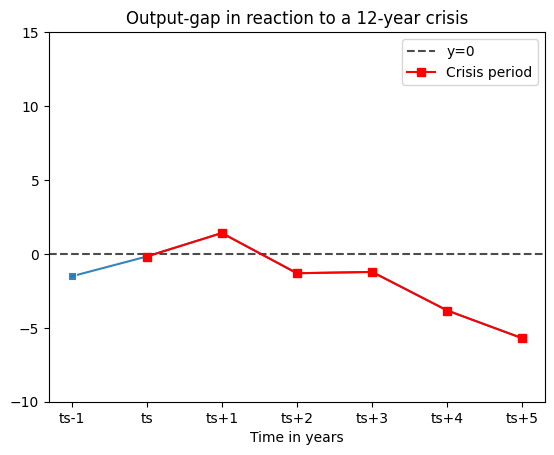

In [23]:
plot_by_crisis_length(output_gap_series, crisis_duration, len_freq, 'Output-gap')

# 4. Crisis & recovery Dynamics in a multiple country database

In [24]:
from functionsA import inflation_dynamics
from functionsA import output_gap_dynamics

In [25]:
from visualisation import plot_dynamics

191
183


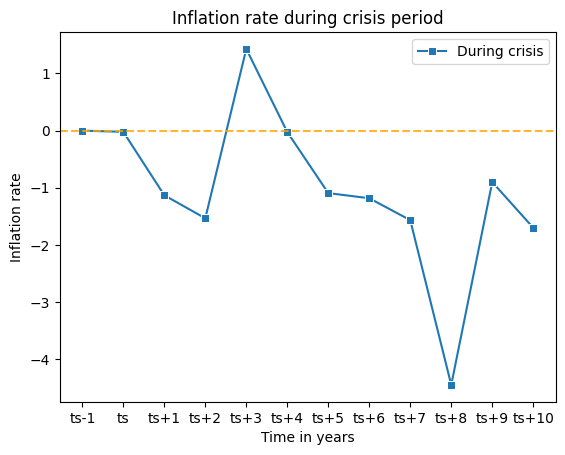

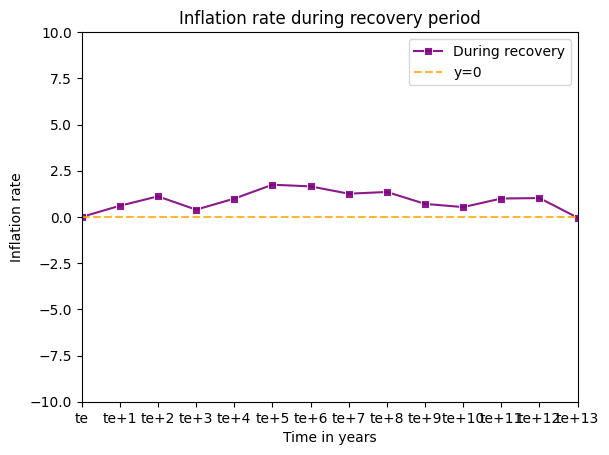

In [26]:
inflation_crisis_series = normalize_crisis_data(inflation_dynamics(global_data, during_crisis = True))
inflation_recovery_series = normalize_crisis_data(inflation_dynamics(global_data, during_crisis = False))
print(len(inflation_crisis_series))
print(len(inflation_recovery_series))
plot_dynamics(inflation_crisis_series, inflation_recovery_series, 'Inflation rate')

174
169


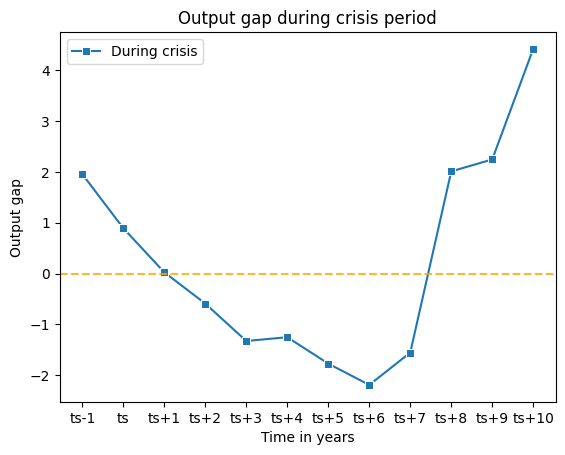

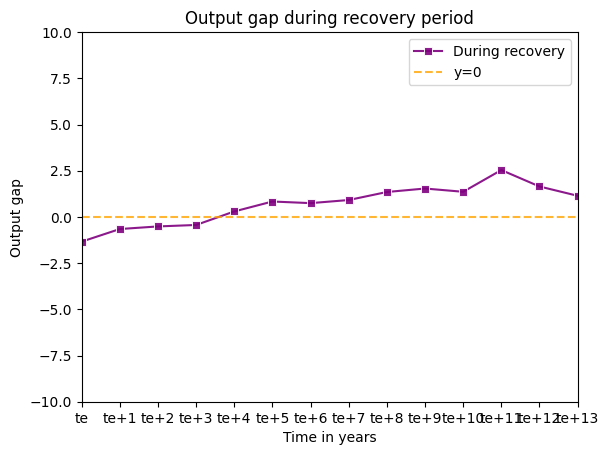

In [27]:
output_gap_crisis_series = output_gap_dynamics(global_data_inner, during_crisis = True)
output_gap_recovery_series = output_gap_dynamics(global_data_inner, during_crisis = False)
print(len(output_gap_crisis_series))
print(len(output_gap_recovery_series))
plot_dynamics(output_gap_crisis_series, output_gap_recovery_series, 'Output gap')